<a href="https://colab.research.google.com/github/u6k/ml-sandbox/blob/master/time_series_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Pythonで正規化・標準化（リスト、NumPy配列、pandas.DataFrame） | note.nkmk.me https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/

In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [2]:
import pandas as pd

df = pd.read_csv("drive/My Drive/ml_data/stock_prices.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92833 entries, 0 to 92832
Data columns (total 9 columns):
id                  92833 non-null int64
ticker_symbol       92833 non-null int64
date                92833 non-null object
opening_price       92833 non-null int64
high_price          92833 non-null int64
low_price           92833 non-null int64
close_price         92833 non-null int64
turnover            92833 non-null int64
adjustment_value    92833 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.4+ MB


,id,ticker_symbol,date,opening_price,high_price,low_price,close_price,turnover,adjustment_value
0,1,1301,2019-04-11 00:00:00,2821,2830,2789,2790,20500,2790
1,2,1301,2019-04-10 00:00:00,2751,2845,2732,2832,59200,2832
2,3,1301,2019-04-09 00:00:00,2759,2768,2748,2768,24700,2768
3,4,1301,2019-04-05 00:00:00,2763,2789,2759,2771,23400,2771
4,5,1301,2019-04-04 00:00:00,2793,2801,2766,2770,32700,2770


In [3]:
df_1301 = df[df.ticker_symbol == 1301]
df_1301.index = df_1301.date
df_1301 = df_1301.sort_index()
df_1301 = df_1301[["opening_price",
                   "high_price",
                   "low_price",
                   "close_price",
                   "adjustment_value"]]

df_1301.info()
df_1301


<class 'pandas.core.frame.DataFrame'>
Index: 9125 entries, 1983-01-04 00:00:00 to 2019-04-12 00:00:00
Data columns (total 5 columns):
opening_price       9125 non-null int64
high_price          9125 non-null int64
low_price           9125 non-null int64
close_price         9125 non-null int64
adjustment_value    9125 non-null int64
dtypes: int64(5)
memory usage: 427.7+ KB


,opening_price,high_price,low_price,close_price,adjustment_value
date,,,,,
1983-01-04 00:00:00,144,144,140,141,1410
1983-01-05 00:00:00,144,155,142,153,1530
1983-01-06 00:00:00,162,168,157,160,1600
1983-01-07 00:00:00,160,162,155,155,1550
1983-01-08 00:00:00,157,158,152,152,1520
1983-01-10 00:00:00,155,155,151,153,1530
1983-01-11 00:00:00,156,164,153,164,1640
1983-01-12 00:00:00,164,164,160,160,1600
1983-01-13 00:00:00,160,161,158,158,1580


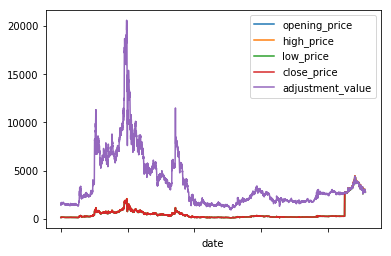

In [4]:
df_1301.plot()

In [5]:
import numpy as np
from sklearn import preprocessing

adjustment_values = np.array(df_1301["adjustment_value"].astype("float32"))
df_1301["scaled_adjustment_value"] = preprocessing.minmax_scale(adjustment_values)

df_1301

,opening_price,high_price,low_price,close_price,adjustment_value,scaled_adjustment_value
date,,,,,,
1983-01-04 00:00:00,144,144,140,141,1410,0.023410
1983-01-05 00:00:00,144,155,142,153,1530,0.029517
1983-01-06 00:00:00,162,168,157,160,1600,0.033079
1983-01-07 00:00:00,160,162,155,155,1550,0.030534
1983-01-08 00:00:00,157,158,152,152,1520,0.029008
1983-01-10 00:00:00,155,155,151,153,1530,0.029517
1983-01-11 00:00:00,156,164,153,164,1640,0.035115
1983-01-12 00:00:00,164,164,160,160,1600,0.033079
1983-01-13 00:00:00,160,161,158,158,1580,0.032061


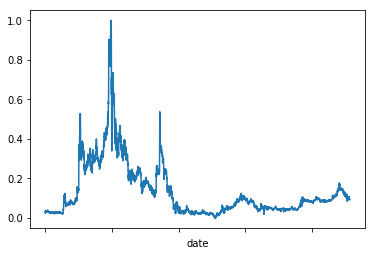

In [6]:
df_1301["scaled_adjustment_value"].plot()

In [0]:
# 60日のデータを使い、61日目を予測する

scaled_adjustment_values = np.array(df_1301["scaled_adjustment_value"].astype("float32"))

x, y = [], []
length = 120

for i in range(len(scaled_adjustment_values) - length):
  x.append(scaled_adjustment_values[i:i+length])
  y.append(scaled_adjustment_values[i+length])

data = np.array(x).reshape(len(x), length, 1)
target = np.array(y).reshape(len(y), 1)

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

length_of_sequence = 120
in_out_neurons = 1
n_hidden = 300

batch_size = 1024
epoch = 100

model = Sequential()
model.add(LSTM(n_hidden,
               batch_input_shape=(None, length_of_sequence, in_out_neurons),
               return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))

history = model.fit(data,
                    target,
                    batch_size=batch_size,
                    epochs=epoch,
                    validation_split=0.2,
                    callbacks=[EarlyStopping()])

Train on 7204 samples, validate on 1801 samples
Epoch 1/100
7204/7204 [==============================] - 3s 459us/step - loss: 0.0105 - val_loss: 7.6805e-05
Epoch 2/100
7204/7204 [==============================] - 2s 276us/step - loss: 0.0010 - val_loss: 2.3691e-05
Epoch 3/100
7204/7204 [==============================] - 2s 277us/step - loss: 5.0572e-04 - val_loss: 5.2839e-05


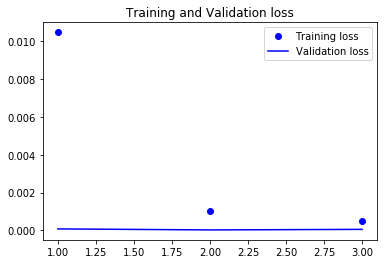

In [30]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [31]:
future_result = []

for idx, test_data in enumerate(x):
  future_test = np.reshape(test_data, (1, 120, 1))
  result = model.predict(future_test)
  future_result.append(result[0][0])
  
  if idx % 100 == 0:
    print("{0}/{1}".format(idx, len(x)))

future_result

0/9005
100/9005
200/9005
300/9005
400/9005
500/9005
600/9005
700/9005
800/9005
900/9005
1000/9005
1100/9005
1200/9005
1300/9005
1400/9005
1500/9005
1600/9005
1700/9005
1800/9005
1900/9005
2000/9005
2100/9005
2200/9005
2300/9005
2400/9005
2500/9005
2600/9005
2700/9005
2800/9005
2900/9005
3000/9005
3100/9005
3200/9005
3300/9005
3400/9005
3500/9005
3600/9005
3700/9005
3800/9005
3900/9005
4000/9005
4100/9005
4200/9005
4300/9005
4400/9005
4500/9005
4600/9005
4700/9005
4800/9005
4900/9005
5000/9005
5100/9005
5200/9005
5300/9005
5400/9005
5500/9005
5600/9005
5700/9005
5800/9005
5900/9005
6000/9005
6100/9005
6200/9005
6300/9005
6400/9005
6500/9005
6600/9005
6700/9005
6800/9005
6900/9005
7000/9005
7100/9005
7200/9005
7300/9005
7400/9005
7500/9005
7600/9005
7700/9005
7800/9005
7900/9005
8000/9005
8100/9005
8200/9005
8300/9005
8400/9005
8500/9005
8600/9005
8700/9005
8800/9005
8900/9005
9000/9005


[0.02115304,
 0.021061093,
 0.021034624,
 0.021011319,
 0.020941047,
 0.020837117,
 0.020686693,
 0.020548671,
 0.020407988,
 0.02026653,
 0.020139065,
 0.020032752,
 0.019836748,
 0.019831067,
 0.019956639,
 0.020306535,
 0.020743938,
 0.021085136,
 0.021421349,
 0.021911817,
 0.022458829,
 0.022781234,
 0.023098046,
 0.023385767,
 0.023600083,
 0.023674637,
 0.023670793,
 0.02374826,
 0.023905862,
 0.023980977,
 0.023959609,
 0.023846667,
 0.023565501,
 0.023136782,
 0.022614766,
 0.022040494,
 0.021480724,
 0.021023983,
 0.020837642,
 0.020844154,
 0.020985983,
 0.021167932,
 0.021341065,
 0.021378629,
 0.021255262,
 0.021150324,
 0.021182964,
 0.021432357,
 0.02163499,
 0.021721732,
 0.021732308,
 0.021735223,
 0.021709424,
 0.0216936,
 0.021623554,
 0.021351442,
 0.020972833,
 0.020584559,
 0.020192625,
 0.019824872,
 0.019546209,
 0.019361274,
 0.019249607,
 0.01919186,
 0.019171327,
 0.01921214,
 0.019335706,
 0.019621257,
 0.020012714,
 0.020388234,
 0.020702654,
 0.020911984,


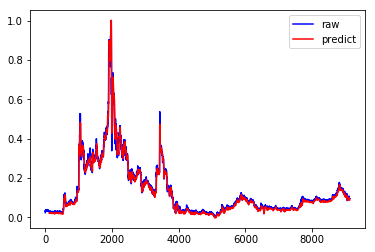

In [33]:
plt.figure()
plt.plot(range(0, len(scaled_adjustment_values)),
         scaled_adjustment_values,
         color="b",
         label="raw")
plt.plot(range(120, len(future_result)+120),
         future_result,
         color="r",
         label="predict")
plt.legend()
plt.show()

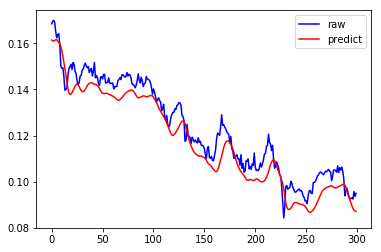

In [34]:
raw = scaled_adjustment_values[-300:]
predict = future_result[-300:]

plt.figure()
plt.plot(range(0, len(raw)),
         raw,
         color="b",
         label="raw")
plt.plot(range(0, len(predict)),
         predict,
         color="r",
         label="predict")
plt.legend()
plt.show()